<a href="https://colab.research.google.com/github/Ajinkya-18/Bitcoin-Price-Prediction/blob/main/Project1_Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [28]:
df = pd.read_csv('/content/bitcoin_2017_to_2023.csv')

In [29]:
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79485 entries, 0 to 79484
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     79485 non-null  object 
 1   open                          79485 non-null  float64
 2   high                          79485 non-null  float64
 3   low                           79485 non-null  float64
 4   close                         79485 non-null  float64
 5   volume                        79485 non-null  float64
 6   quote_asset_volume            79485 non-null  float64
 7   number_of_trades              79485 non-null  int64  
 8   taker_buy_base_asset_volume   79485 non-null  float64
 9   taker_buy_quote_asset_volume  79485 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 6.1+ MB


In [31]:
df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,79485.000000,79485.000000,79485.000000,79485.000000,79485.000000,7.948500e+04,79485.000000,79485.000000,7.948500e+04
mean,29146.325595,29152.227464,29140.227120,29146.351755,26.034591,7.580504e+05,579.262880,12.488914,3.636827e+05
std,1795.459538,1795.488506,1795.342182,1795.439809,51.180067,1.497726e+06,815.780149,26.479819,7.784535e+05
min,24856.980000,24879.410000,24800.000000,24856.980000,0.259700,7.753510e+03,69.000000,0.051830,1.522876e+03
25%,28776.710000,28788.000000,28770.140000,28776.810000,6.620480,1.928273e+05,267.000000,2.014420,5.868536e+04
50%,29979.980000,29985.990000,29972.010000,29979.990000,13.508060,3.917601e+05,396.000000,5.661590,1.642645e+05
75%,30393.990000,30399.960000,30387.950000,30393.990000,27.241900,7.905924e+05,618.000000,13.149200,3.822450e+05
max,31798.010000,31804.200000,31723.970000,31798.000000,1968.918260,6.138905e+07,41976.000000,1325.845750,4.132450e+07


In [32]:
df.isnull().sum()

,0
timestamp,0
open,0
high,0
low,0
close,0
volume,0
quote_asset_volume,0
number_of_trades,0
taker_buy_base_asset_volume,0
taker_buy_quote_asset_volume,0


In [33]:
df1 = df.dropna()

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79485 entries, 0 to 79484
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     79485 non-null  object 
 1   open                          79485 non-null  float64
 2   high                          79485 non-null  float64
 3   low                           79485 non-null  float64
 4   close                         79485 non-null  float64
 5   volume                        79485 non-null  float64
 6   quote_asset_volume            79485 non-null  float64
 7   number_of_trades              79485 non-null  int64  
 8   taker_buy_base_asset_volume   79485 non-null  float64
 9   taker_buy_quote_asset_volume  79485 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 6.1+ MB


###Exploratory Data Analysis(EDA)

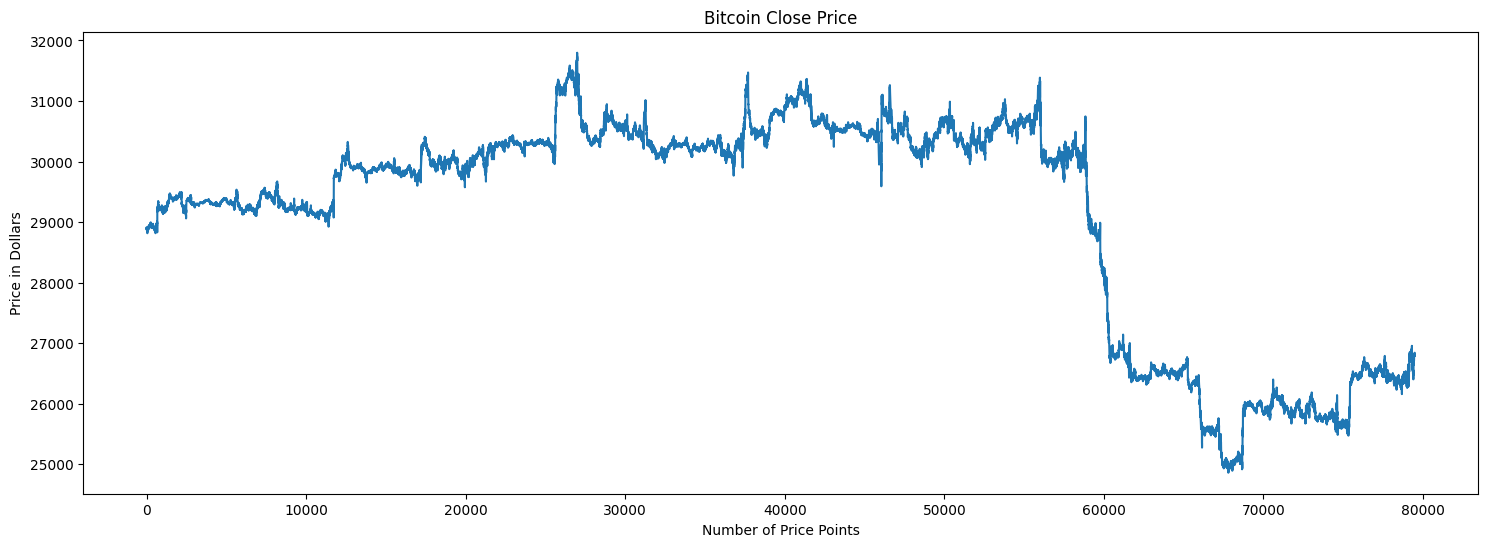

In [35]:
plt.figure(figsize=(18,6))
plt.title("Bitcoin Close Price", fontsize=12)
plt.plot(df1["close"])
plt.xlabel("Number of Price Points")
plt.ylabel("Price in Dollars")
plt.show()

<ipython-input-36-0ad9abd1766f>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


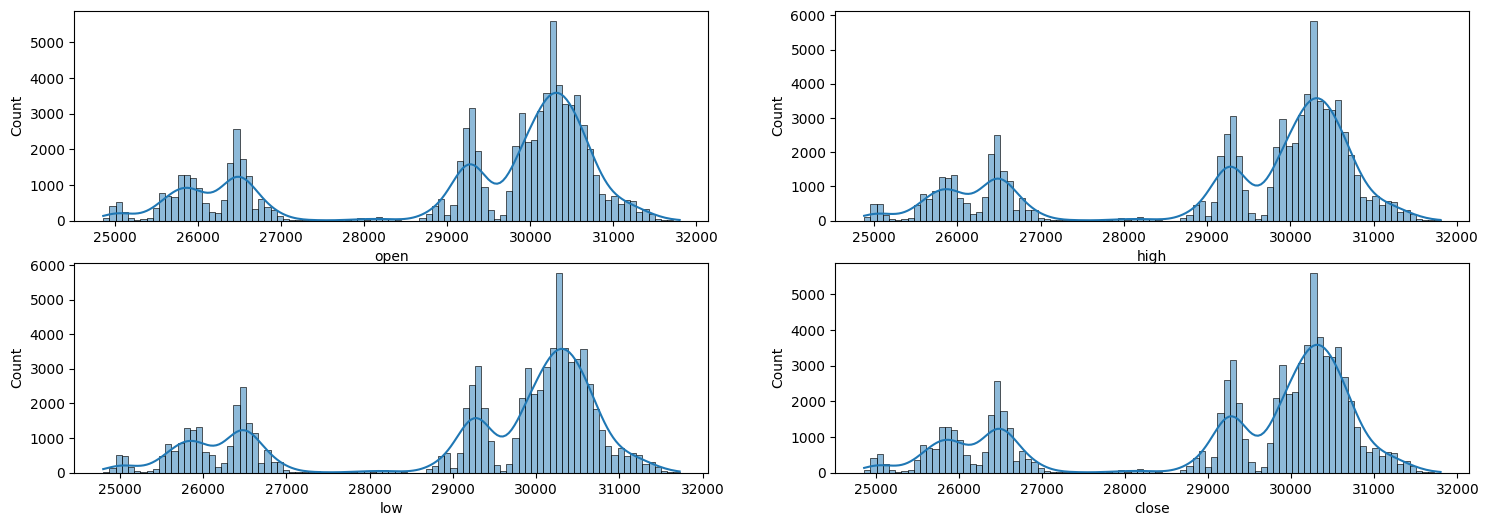

In [36]:
features = ['open', 'high', 'low', 'close']
plt.subplots(figsize=(18,6))

for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.histplot(df1[col], kde=True)

plt.show()

###Checking for Outliers

<ipython-input-37-bc64edf76fb3>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


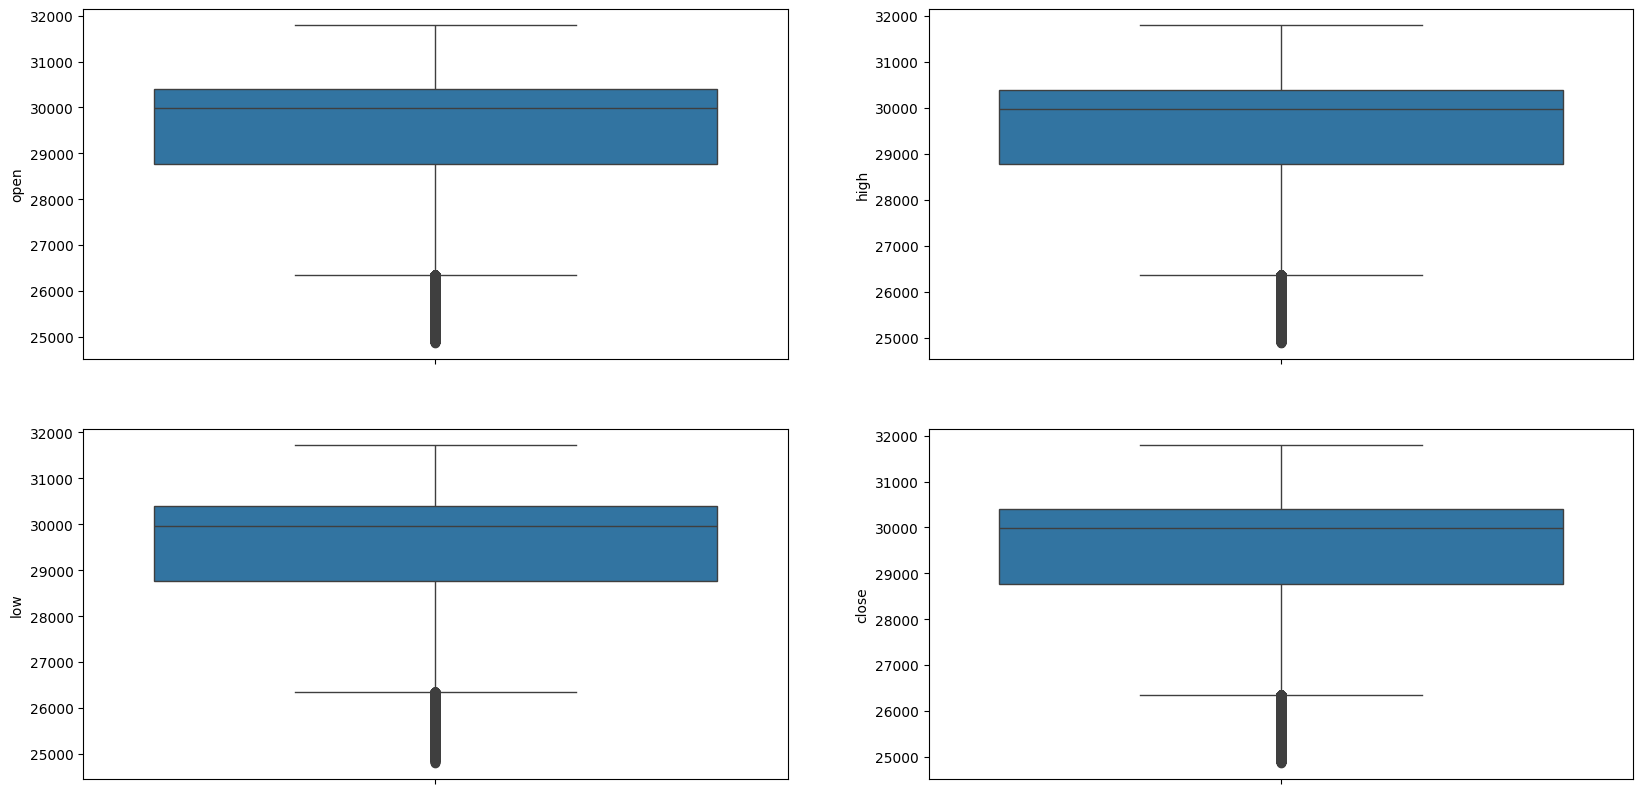

In [37]:
plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2, 2, i+1)
  sb.boxplot(df1[col])

plt.show()

In [38]:
splitted = df1['timestamp'].str.split(' ', expand=True)
df1['date'] = splitted[0].astype('str')
df1['time'] = splitted[1].astype('str')

In [39]:
df1 = df1.drop('timestamp', axis=1)

In [40]:
splitted1 = df1['date'].str.split('-', expand=True)
df1['year'] = splitted1[0].astype('int')
df1['month'] = splitted1[1].astype('int')
df1['day'] = splitted1[2].astype('int')

In [41]:
# saved the date and time column in separate series for future reference before deleting from the dataframe
date = pd.Series(df1['date'])
time = pd.Series(df1['time'])

In [42]:
df1 = df1.drop('date', axis=1)
df1 = df1.drop('time', axis=1)

In [43]:
df1.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,year,month,day
0,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836,2023,8,1
1,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195,2023,8,1
2,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121,2023,8,1
3,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916,2023,8,1
4,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611,2023,8,1


In [44]:
df1['open-close'] = df1['open'] - df1['close']
df1['low-high'] = df1['low'] - df1['high']
df1['target'] = np.where(df1['close'].shift(-1) > df1['close'], 1, 0)

In [45]:
df1['is_quarter_end'] = np.where((df1['month']%3)==0,1,0)

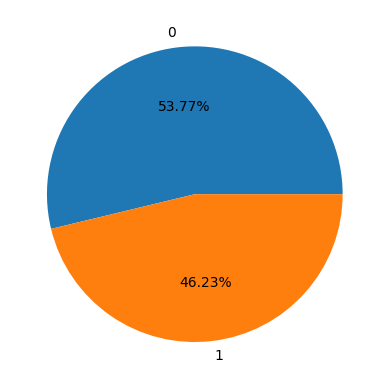

In [46]:
plt.pie(df1['target'].value_counts().values, labels = [0,1], autopct = "%.2f%%")
plt.show()

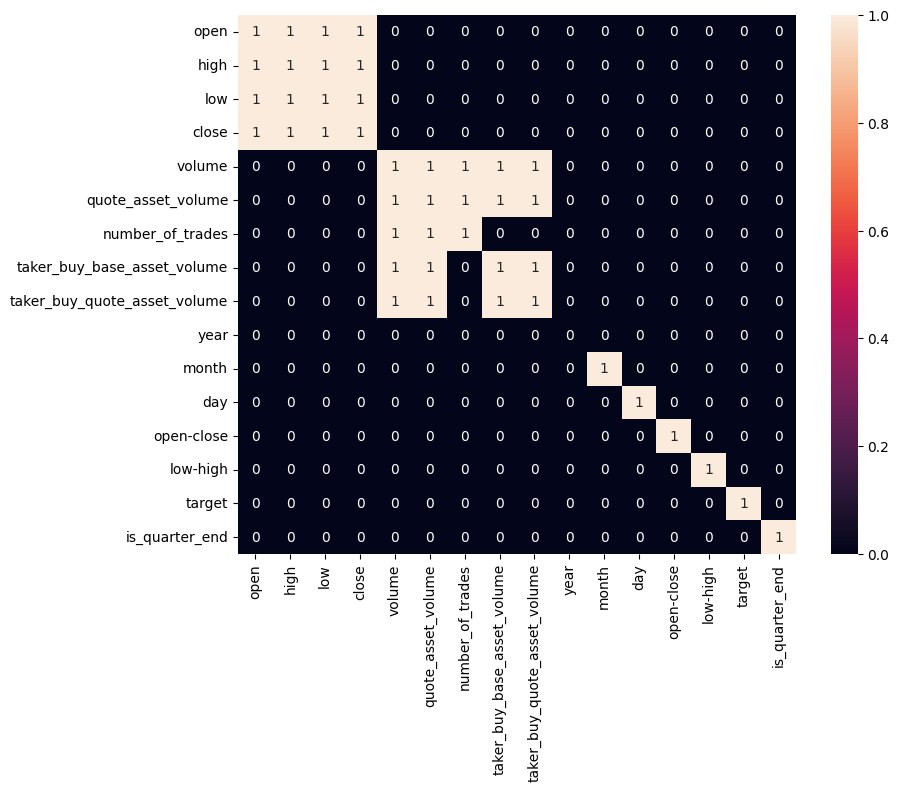

In [47]:
plt.figure(figsize = (9,7))
sb.heatmap(df1.corr() > 0.9, annot = True, cbar=True)
plt.show()

##Model Training

In [48]:
features = df1[['open-close', 'low-high', 'is_quarter_end']]
target = df1['target']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=2022)

In [49]:
print(x_train.shape, x_test.shape)

(63588, 3) (15897, 3)


In [50]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]
for i in range(3):
  models[i].fit(x_train, y_train)
  print(f'{models[i]}')
  print("Training Accuracy: ", metrics.roc_auc_score(y_train, models[i].predict_proba(x_train)[:,1]))
  print("Testing Accuracy: ", metrics.roc_auc_score(y_test, models[i].predict_proba(x_test)[:,1]))
  print()

LogisticRegression()
Training Accuracy:  0.9930809905218229
Testing Accuracy:  0.9938603989624398

SVC(kernel='poly', probability=True)
Training Accuracy:  0.9930861919527473
Testing Accuracy:  0.9936076389137614

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Training Accuracy:  0.995817

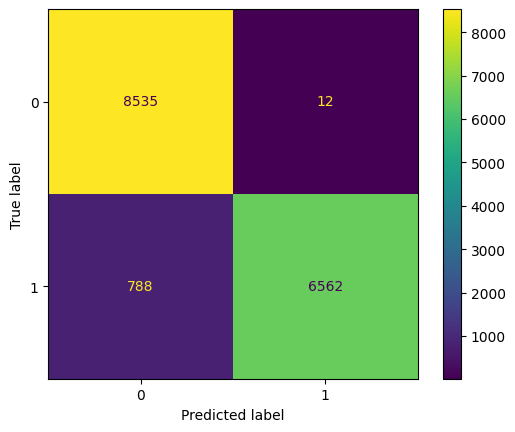

In [55]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, models[0].predict(x_test))
#disp.plot()
#plt.show()